# Julia: A Tool for Computational and Experimental Mathematics?
## Talk for 2020 REU: [Research Challenges of Computational and Experimental Mathematics](https://www.moravian.edu/mathematics/reu)

### [Jason M. Graham](https://sites.google.com/site/jasonmgrahamus/)
### [University of Scranton](https://www.scranton.edu/), [Department of Mathematics](https://www.scranton.edu/academics/cas/math/) 

#### [My GitHub Repo](https://github.com/jmgraham30) - Talk slides are available [here](https://github.com/jmgraham30/JuliaCompExpMath).                                   

In [42]:
;pwd

/Users/grahamj7/Documents/GitHub/JuliaCompExpMath


In [43]:
using Pkg;
Pkg.activate(".")

 Activating environment at `~/Documents/GitHub/JuliaCompExpMath/Project.toml`


## About Me

- Undergraduate degree in Mathematics 
- Masters degree in Computational and Applied Mathematics
- PhD in [Applied Mathematical and Computational Sciences](https://www.amcs.uiowa.edu/)
- Associate Professor in Mathematics 
- Research interests in mathematical, computational, and statistical modeling in biological systems 
- Mentor [MBI](https://mbi.osu.edu/) REU students at the [Swarm Lab at NJIT](https://www.theswarmlab.com/)

## Plan for the Talk
- Introduce the Julia language ecosystem as a potential tool for research in computational and experimental mathematics. 
   - We will not cover Julia syntax here, to get started the [Julia Academy](https://juliaacademy.com/courses) Introduction to Julia course is highly recommended. **Note that the downloadable notebooks are more up to date than the video lectures.**  
   - Specifically, we will introduce packages such as [AbstractAlgebra.jl](https://nemocas.github.io/AbstractAlgebra.jl/latest/index.html), [BasicNT.jl](https://github.com/jmgraham30/BasicNT.jl), [DifferentialEquations.jl](https://docs.sciml.ai/stable/), [Distributions.jl](https://juliastats.org/Distributions.jl/stable/), [LightGraphs.jl](https://juliagraphs.org/LightGraphs.jl/stable/), although how much we get through will depend on time.  

- Additionally, depending on available time we will also introduce some associated tools for interoperability and reproducibility. For example,
  - [Conda.jl](https://github.com/JuliaPy/Conda.jl), [PyCall.jl](https://github.com/JuliaPy/PyCall.jl) for calling Python from Julia
  - [IJulia.jl](https://github.com/JuliaLang/IJulia.jl), [Weave.jl](http://weavejl.mpastell.com/stable/) for interactive computing with Jupyter notebooks and integrating code with $\LaTeX$.  
  - [Atom](https://atom.io/) and [Juno](https://junolab.org/) for development and GitHub integration. 

- A lot of additional resources related to this talk are posted on my GitHub, see in particular [JuliaCompExpMath](https://github.com/jmgraham30/JuliaCompExpMath) and [BasicNT.jl](https://github.com/jmgraham30/BasicNT.jl). 

![ ](juliaLogo.png)

## What is the deal with [Julia](https://julialang.org/)?

1. Free, open source, and will run on most any platform. 
  - This means that almost anything you do using Julia is portable, say for example to [AWS](https://aws.amazon.com/) for large scale computing tasks.  
2. Dynamically typed and easy to program. 
  - Similar to Python or MATLAB, *e.g.*, see the [MATLAB-Python-Julia cheatsheet](https://cheatsheets.quantecon.org/).
3. **Fast** (the second time)
  - Comparable with C. It's okay to write loops!
4. Great interoperability (*e.g.*, with [Python](https://github.com/JuliaPy))
5. In addition to powerful numerical capabilities, Julia also has symbolic math capabilities through packages like [SymEngine.jl](https://github.com/symengine/SymEngine.jl) and [SymPy.jl](https://github.com/JuliaPy/SymPy.jl). 

## Accessing Julia and Getting Started

While Julia is pretty easy to install locally, if you are just getting started or only want to experiment a few options include:

1. Julia through the cloud
  - [JuliaBox](https://juliabox.com/)
  - [CoCalc](cocalc.com)
  
2. [JuliaPro](https://juliacomputing.com/products/juliapro.html), an "anaconda style" installation that comes pre-loaded with many scientific packages, an ide, and web-based jupyter notebooks.  

For excellent Julia tutorials check out [The Julia Academy](https://juliaacademy.com/courses). 

Some other interesting resources are [Statistics with Julia](https://github.com/h-Klok/StatsWithJuliaBook) and [Algorithms for Optimization](https://mitpress.mit.edu/books/algorithms-optimization). 

# Julia in Action

We will quickly go over: 

1. Numerical differential equations with Julia
2. Graph with Julia
3. Randomness with Julia
4. Some algebra using Julia
5. Reproducibility including the structure of a simple package

I will try to pause for questions after each section. 

My approach here is to provide pointers to methods and ideas that may be useful to you during your REU research and not really to fully explain everything I introduce.  

Any questions as of now? 

## Numerical Solution of Differential Equations in Julia

In [44]:
# Load necessary packages with using keyword
using DifferentialEquations, ParameterizedFunctions, Latexify, Plots; pyplot();

Pretty much all implementations of numerical methods for solving differential equations require four pieces of information:

1. Code in the form of a function that describe the differential equation(s). 
2. The specification of values for any and all parameters. 
3. The specification of initial values. 
4. The specification of the time interval over which solutions are to be sought. 

Let's see how each of these parts are done in Julia. 

We will use as an example the [Lotka-Volterra equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations). 

In [45]:
# here right hand side is specified as a parameterized function
predatorprey! = @ode_def PredatorPrey begin
  dx = α*x - β*x*y
  dy = γ*x*y - δ*y
end α β γ δ

(::PredatorPrey{var"###ParameterizedDiffEqFunction#365",var"###ParameterizedTGradFunction#366",var"###ParameterizedJacobianFunction#367",Nothing,Nothing,ModelingToolkit.ODESystem}) (generic function with 1 method)

Just as a note, we can use Julia to obtain the $\LaTeX$ expression of a parameterized function! See [this video](https://www.youtube.com/watch?v=wpV0Nz-93Hk) for more on Latexify. 

In [46]:
latexify(predatorprey!)

L"$\begin{align}
\frac{dx(t)}{dt} =& \alpha \mathrm{x}\left( t \right) - \beta \mathrm{x}\left( t \right) \mathrm{y}\left( t \right) \\
\frac{dy(t)}{dt} =& \gamma \mathrm{x}\left( t \right) \mathrm{y}\left( t \right) - \delta \mathrm{y}\left( t \right)
\end{align}
$"

We can even print out the corresponding $\TeX$ commands:

In [47]:
print(latexify(predatorprey!))

$\begin{align}
\frac{dx(t)}{dt} =& \alpha \mathrm{x}\left( t \right) - \beta \mathrm{x}\left( t \right) \mathrm{y}\left( t \right) \\
\frac{dy(t)}{dt} =& \gamma \mathrm{x}\left( t \right) \mathrm{y}\left( t \right) - \delta \mathrm{y}\left( t \right)
\end{align}
$

Next, we specify our parameter values, initial conditions, and time interval; and then setup and solve the problem in Julia. 

In [48]:
p = (1.5,1.0,3.0,1.0); # parameters
u0 = [1., 1.]; # initial conditions
tspan = (0., 10.); # time interval 
prob = ODEProblem(predatorprey!, u0, tspan, p); # problem specification
sol = solve(prob); # solver

The plot method from Plots.jl will plot the solution object returned from a call to the solver as a time-series for each component of the solution. 

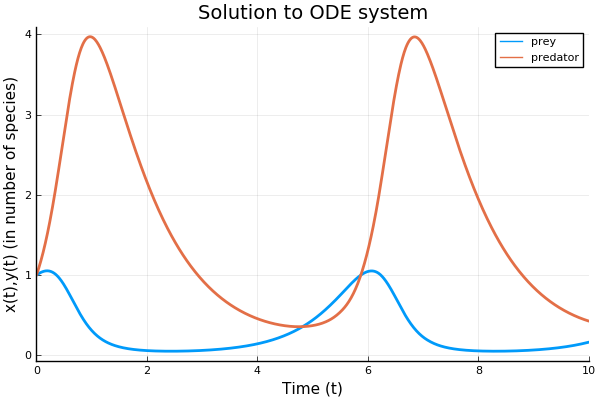

In [49]:
plot(sol,linewidth=2,title="Solution to ODE system",
xaxis="Time (t)",yaxis="x(t),y(t) (in number of species)",label=["prey" "predator"])

Alternatively, we may plot the solution in the phase-plane. 

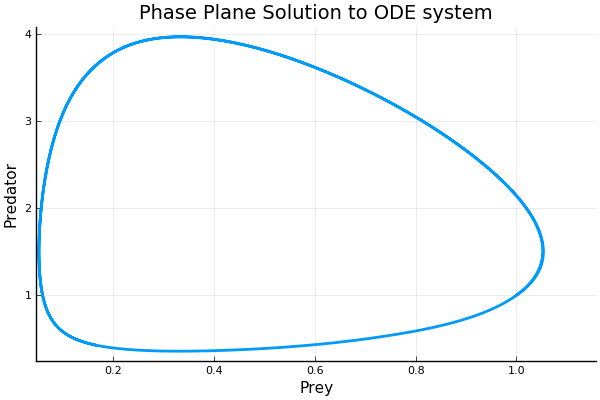

In [50]:
plot(sol,vars=(1,2),linewidth=2,title="Phase Plane Solution to ODE system",
xaxis="Prey",yaxis="Predator",legend=false)

It is easy to "fill in" the phase plane with trajectories corresponding to many different initial values. 

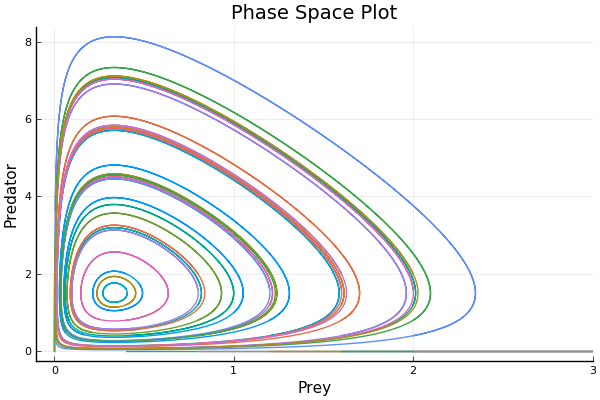

In [51]:
p = plot(sol,vars = (1,2), xlims = (-0.1,3), title = "Phase Space Plot", xaxis = "Prey", yaxis = "Predator", leg=false)
function phase_plot(prob, u0, parms, p, tspan=10.0)
    _prob = ODEProblem(prob.f,u0,(0.0,tspan),parms)
    sol = solve(_prob,Vern9()) # Use Vern9 solver for higher accuracy
    plot!(p,sol,vars = (1,2), xlims = nothing, ylims = nothing)
end
for i in 0.:0.4:2.0
    for j in 0.:0.4:2.0
        phase_plot(prob, [j,i],[1.5,1.0,3.0,1.0],p)
    end
end
plot(p,xlims = (-0.1,3))

### Questions on Numerical ODEs in Julia

Are there any questions on what we have covered so far? 

## Graphs with Julia

In [52]:
using LightGraphs, GraphPlot;

The goal of [LightGraphs.jl](https://github.com/JuliaGraphs/LightGraphs.jl) is to offer a performant platform for network and graph analysis in Julia. One can easily create a undirected or directed graph with LightGraphs and display the graph with GraphPlot. For example, 

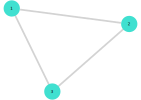

In [53]:
G₁ = SimpleGraph(3) # graph with 3 vertices

# make a triangle
add_edge!(G₁, 1, 2)
add_edge!(G₁, 1, 3)
add_edge!(G₁, 2, 3)

gplot(G₁, nodelabel=vertices(G₁)) # plot and label nodes

Alternatively, one can construct a graph from its [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix):

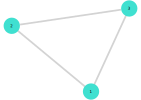

In [54]:
A = [
    0 1 1
    1 0 1
    1 1 0
]

G₂ = Graph(A)

gplot(G₂, nodelabel=vertices(G₂))

 To create a random graph with directed edges, use:

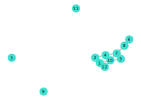

In [55]:
# Note that each time we run the previous code we get a different graph.
G = DiGraph(12,12)

gplot(G,nodelabel=vertices(G))

It is simple to loop through the edges of the graph and print out all the connections.   

In [56]:
for e in edges(G)
    u, v = src(e), dst(e)
    println("edge $u - $v")
end

edge 1 - 10
edge 1 - 12
edge 2 - 1
edge 2 - 4
edge 5 - 7
edge 7 - 4
edge 7 - 10
edge 8 - 6
edge 8 - 7
edge 10 - 4
edge 10 - 5
edge 12 - 10


There are simple functions to return graph properties. For example, to print out the adjacency matrix of a graph you can do as follows:

In [57]:
adjacency_matrix(G)

12×12 SparseArrays.SparseMatrixCSC{Int64,Int64} with 12 stored entries:
  [2 ,  1]  =  1
  [2 ,  4]  =  1
  [7 ,  4]  =  1
  [10,  4]  =  1
  [10,  5]  =  1
  [8 ,  6]  =  1
  [5 ,  7]  =  1
  [8 ,  7]  =  1
  [1 , 10]  =  1
  [7 , 10]  =  1
  [12, 10]  =  1
  [1 , 12]  =  1

It is also easy to modify a gaph by say adding vertices. 

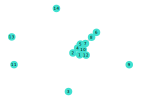

In [58]:
add_vertices!(G,2)
gplot(G,nodelabel=vertices(G))

Of course we can also modify edges.  

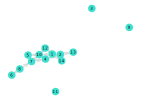

In [59]:
add_edge!(G, 2, 13)
add_edge!(G,1,14)
gplot(G,nodelabel=vertices(G))

There is a lot more that one can do. To explore, type ?LightGraphs. and hit tab key. 

In [60]:
?LightGraphs.degree

```
degree(g[, v])
```

Return a vector corresponding to the number of edges which start or end at each vertex in graph `g`. If `v` is specified, only return degrees for vertices in `v`. For directed graphs, this value equals the incoming plus outgoing edges. For undirected graphs, it equals the connected edges.

# Examples

```jldoctest
julia> using LightGraphs

julia> g = DiGraph(3);

julia> add_edge!(g, 2, 3);

julia> add_edge!(g, 3, 1);

julia> degree(g)
3-element Array{Int64,1}:
 1
 1
 2
```


To learn more about exploring graphs in Julia using LightGraphs.jl, see this [introductory lecture](http://matbesancon.github.io/slides/JuliaNantes/Graphs#/) or the [tutorials](https://github.com/JuliaGraphs/JuliaGraphsTutorials).

### Questions on Graphs in Julia

Are there any questions on what we have covered regarding graphs? 

## Modeling Probability and Randomness with Julia

In [61]:
using Statistics, StatsBase, Random, Distributions;

In Julia it is simple to obtain random samples from a uniform distribution (using rand), and normal distribution (using randn), or a sample of a fixed size from some specified set (either with or without replacement) using sample. (The functions rand, randn, and sample are all part of the [Random.jl](https://docs.julialang.org/en/v1/stdlib/Random/) package. See the ModelingProbability.ipyn notebook for examples). Here we briefly illustrate how [Distributions.jl](https://juliastats.org/Distributions.jl/stable/) extends base sampling capabilities by implementing a large collection of probability distributions and related functions. Particularly, Distributions.jl implements:

* Sampling from many probability distributions
* Moments (e.g mean, variance, skewness, and kurtosis), entropy, and other properties
* Probability density/mass functions (pdf) and their logarithm (logpdf)
* Moment-generating functions and characteristic functions
* Maximum likelihood estimation


We will illustrate a small part of the functionality for Distribution.jl, see the [documentation](http://juliastats.org/Distributions.jl/v0.22/) or the references [The Distributions.jl paper](https://arxiv.org/pdf/1907.08611.pdf) and [Statistics with Julia](https://people.smp.uq.edu.au/YoniNazarathy/julia-stats/StatisticsWithJulia.pdf) for more details and applications. 

A common discrete distribution is the binomial distributions which models the probability of tossing $k$ heads out of $n$ total tosses of a coin where the probability of landing heads on any single toss is some value $p$. Let's see how this is implemented in Julia via Distributions.jl. 

In [62]:
?Binomial

search: Binomial binomial PoissonBinomial NegativeBinomial BetaBinomial



```
Binomial(n,p)
```

A *Binomial distribution* characterizes the number of successes in a sequence of independent trials. It has two parameters: `n`, the number of trials, and `p`, the probability of success in an individual trial, with the distribution:

$$
P(X = k) = {n \choose k}p^k(1-p)^{n-k},  \quad \text{ for } k = 0,1,2, \ldots, n.
$$

```julia
Binomial()      # Binomial distribution with n = 1 and p = 0.5
Binomial(n)     # Binomial distribution for n trials with success rate p = 0.5
Binomial(n, p)  # Binomial distribution for n trials with success rate p

params(d)       # Get the parameters, i.e. (n, p)
ntrials(d)      # Get the number of trials, i.e. n
succprob(d)     # Get the success rate, i.e. p
failprob(d)     # Get the failure rate, i.e. 1 - p
```

External links:

  * [Binomial distribution on Wikipedia](http://en.wikipedia.org/wiki/Binomial_distribution)


In [63]:
# create a binomial random variable with n=10 and p=0.5
binom = Binomial(10,0.5)

Binomial{Float64}(n=10, p=0.5)

In [64]:
# compute the mean and variance for this random variable
println(mean(binom))
println(var(binom))

5.0
2.5


Let's take a few samples from this distribution.

In [65]:
rand(binom,10)

10-element Array{Int64,1}:
  1
 10
  6
  7
  4
  5
  7
  9
  4
  5

Let's take a large number of random samples from this distribution and plot the result as a histogram. 

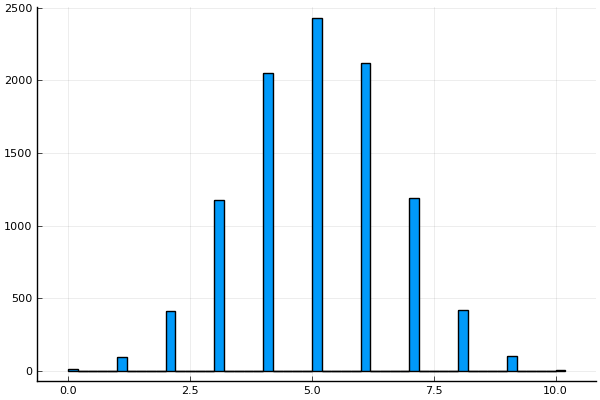

In [66]:
samps = rand(binom,10000);
histogram(samps,legend=false)

Let's plot the probability mass function for this random variable. (Note that Julia refers to both pdf's and pmf's as pdf.)

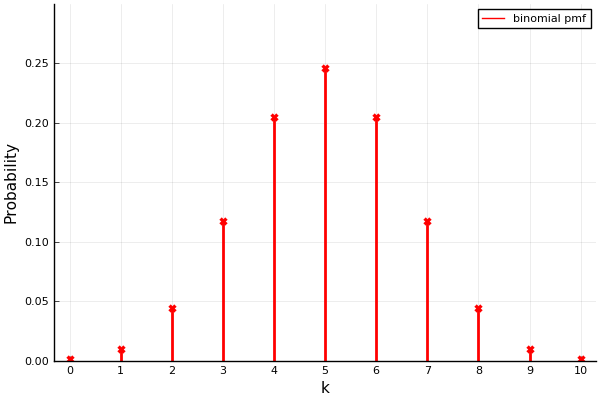

In [67]:
k = 0:10; 
y = pdf.(binom,k);
plot(k, y,line=:stem, marker=:xcross, c=:red,
   ms=6, msw=0, lw=2, label="binomial pmf", xticks=(0:1:10),
   ylims=(0,0.3), xlabel="k", ylabel="Probability")

Plotting the cdf is just as easy.

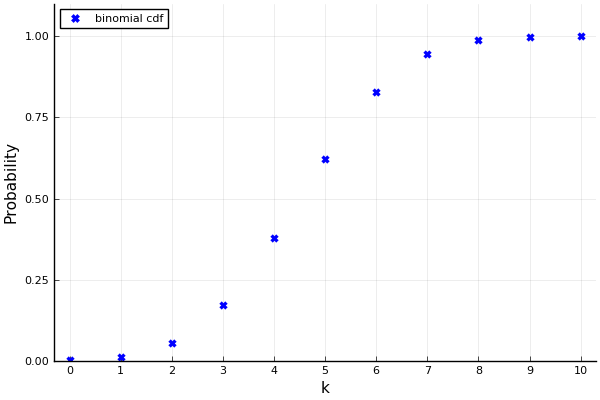

In [68]:
k = 0:10;
y = cdf.(binom,k);
scatter(k, y, marker=:xcross, c=:blue,
   ms=6, msw=0, lw=2, label="binomial cdf", legend=:topleft,xticks=(0:1:10),
   ylims=(0,1.1), xlabel="k", ylabel="Probability")

### Questions on Randomness in Julia

Are there any questions on what we have covered regarding probability and randomness? 

## Some Algebra in Julia

[AbstractAlgebra.jl](https://nemocas.github.io/AbstractAlgebra.jl/latest/) provides methods for handling the algebraic structures of groups, rings, and fields. For groups, the methods are restricted to permutation groups. Here we will illustrate working with rings of polynomials with coefficients in some specified ring. See the JuliaAlgebra notebook from [here](https://github.com/jmgraham30/JuliaCompExpMath) for more material.  

Say for example that we want to look at polynomials over the ring of integers. 

In [69]:
using AbstractAlgebra


In [70]:
R, x = PolynomialRing(ZZ,"x") # creates the indeterminate variable x 

(Univariate Polynomial Ring in x over Integers, x)

Here, R provides a reference to the coefficient ring and x to the indeterminant. Now let's use this to create some polynomials in x over $\mathbb{Z}$. 

In [71]:
f = 2x^3-3x^2+10x-6
g = x - 1
println(f)
println(g)

2*x^3-3*x^2+10*x-6
x-1


Observe that an element of $\mathbb{Z}[x]$ is a specific type in Julia. 

In [72]:
typeof(f)

AbstractAlgebra.Generic.Poly{BigInt}

Let's multiply the polynomials $f = 2x^3-3x^2+10x-6$ and $g = x - 1$. 

In [73]:
println(f*g)

2*x^4-5*x^3+13*x^2-16*x+6


Next, we demonstrate an alternative method for creating an element of $\mathbb{Z}[x]$. 

In [74]:
h = R([1,-3,4,2])

2*x^3+4*x^2-3*x+1

The coeff function allows us to obtain the specific coefficients of a polynomial. 

In [75]:
coeff(h,2)

4

As an application of polynomial rings, let's write code that store the first 100 [Fibonacci polynomials](https://en.wikipedia.org/wiki/Fibonacci_polynomials) defined by 

$F_{1}(x)=1$, 

$F_{2}(x)=x$, and 

$F_{n}(x)=xF_{n-1}(x)+F_{n-2}(x)$ for $n \geq 3$. 

In [76]:
MA = Array{Any,1}(0:100); # initialize array for storing result
# define first two 
MA[1] = 1; 
MA[2] = x;
# implement recursive definition
for i = 1:99
    MA[i+2] = x*MA[i+1]+MA[i];
end

In [77]:
println(MA[1])
println(MA[2])
println(MA[3])
println(MA[4])

1
x
x^2+1
x^3+2*x


Let's do a sanity check:

In [78]:
println(MA[25])
println(MA[26])
println(MA[27])
println(x*MA[26] + MA[25])

x^24+23*x^22+231*x^20+1330*x^18+4845*x^16+11628*x^14+18564*x^12+19448*x^10+12870*x^8+5005*x^6+1001*x^4+78*x^2+1
x^25+24*x^23+253*x^21+1540*x^19+5985*x^17+15504*x^15+27132*x^13+31824*x^11+24310*x^9+11440*x^7+3003*x^5+364*x^3+13*x
x^26+25*x^24+276*x^22+1771*x^20+7315*x^18+20349*x^16+38760*x^14+50388*x^12+43758*x^10+24310*x^8+8008*x^6+1365*x^4+91*x^2+1
x^26+25*x^24+276*x^22+1771*x^20+7315*x^18+20349*x^16+38760*x^14+50388*x^12+43758*x^10+24310*x^8+8008*x^6+1365*x^4+91*x^2+1


Let's print off the coefficients for the 25-th (degree 24) Fibonacci polynomial.

In [79]:
get_coeffs(x) = coeff(MA[25],x)
coeff_array = [get_coeffs(x) for x in 0:24]

25-element Array{BigInt,1}:
     1
     0
    78
     0
  1001
     0
  5005
     0
 12870
     0
 19448
     0
 18564
     0
 11628
     0
  4845
     0
  1330
     0
   231
     0
    23
     0
     1

Now you may perhaps be able to use what we have been looking at in order to experiment with these polynomials. 

### Questions on Algebra in Julia

Are there any questions on what we have covered regarding algebra? 

##  Reproducibility and Sharing Results

There are several good tools available for making our research accessible and usable to others. For example, 

1. Jupyter notebooks via IJulia for interactive computing. This can also be used to share or present your results. 
2. Package development. 

## Jupyter and IJulia

Using Jupyter with Julia is made easy with the [IJulia.jl]() package. Once you have this set up, using the notebooks is straight forward and conventient once you pick up a small number of tricks.

1. See [here](https://github.com/patrickwalls/mathematical-python/blob/master/jupyter/notebook.ipynb) for notebook basics. 

2. See [here](https://github.com/patrickwalls/mathematical-python/blob/master/jupyter/latex.ipynb) for using $\LaTeX$ in notebooks. 

3. See [here](https://github.com/patrickwalls/mathematical-python/blob/master/jupyter/markdown.ipynb) for using markdown in notebooks. 

4. The [RISE](https://rise.readthedocs.io/en/stable/) extension can be used to convert a notebook into presentation slides which is what we have done for this talk. 

## Julia Package Development

If your research produces a lot of code, you might consider organizing it all together into a package that can be fully documented and shared with others. I have followed [this video](https://www.youtube.com/watch?v=QVmU29rCjaA&t=2110s) to create a package "from scratch." To illustrate the structure of a package, consider [BasicNT.jl](https://github.com/jmgraham30/BasicNT.jl). This is a package that implements some algorithms of basic number theory. BasicNT.jl is a package I created by updating the code from an older package [Numbers.jl](https://github.com/hwborchers/Numbers.jl) written by H W Borchers.   

Let's begin by illustrating the usage of BasicNT.jl.

In [80]:
using BasicNT

Among other things, BasicNT contains a function that implements the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes#:~:text=In%20mathematics%2C%20the%20sieve%20of,up%20to%20any%20given%20limit.&text=One%20of%20a%20number%20of,find%20primes%20in%20arithmetic%20progressions.).

In [81]:
BasicNT.primesieve(25)

9-element Array{Int64,1}:
  2
  3
  5
  7
 11
 13
 17
 19
 23

In [82]:
#@edit BasicNT.primesieve(25)

Let's examine the files and code in [BasicNT.jl](https://github.com/jmgraham30/BasicNT.jl).

### Questions on Julia Packages

Are there any questions on what we have covered regarding the development of a Julia package? 

## Conclusion

Julia is both deep and broad and offers a wealth of possibilities for computing in mathematics and its applications. 

We've presented a lot of material here and there is more available for you to use freely as you like. 